# Poceni Pythonska Pojedina
## Seminarska naloga


### Pridobivanje podatkov
Podatke pridobljene s pomočjo `mercator_scraper.py` in pa `okusno_scraper.py` najprej uvozimo za uporabo pri analizi. Glede enot: časi so v minutah, dolžina navodil je v številu znakov. Vse hranilne snovi in energijsko vrednost obravnavamo za 100g jedi. Le-ta je v KJ; beljakovine, maščobe, ogljikovi hidrati in vlaknine so oa v gramih, ter vitamin D je v mednarodnih enotah (iu).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import paths as p

recepti = pd.read_csv(p.RECEPTI_PATH)
recepti.head(10)

,Ime jedi,Avtor,Cas priprave,Cas kuhanja,Skupen cas,Dolzina navodil,Stevilo oseb,Energijska vrednost,Beljakovine,Ogljikovi hidrati,Mascobe,Vlaknine,Vitamin D,CSV
0,Zelenjavna enolončnica z omako pistou,M.J.,15,40,55,1276,4,315.98,1.80,11.00,2.21,1.36,0.00,zelenjavna-enoloncnica-z-omako-pistou
1,Pecivo z malinami in pudingom,Su.S.,20,40,60,1290,6,1260.01,6.38,60.20,2.67,0.74,0.30,torta-z-malinami-in-pudingom
2,Polnjeni lignji s pršutom in sirom,Sanja Sirk,15,35,50,1525,3,579.02,15.07,2.62,6.46,0.09,0.00,polnjeni-lignji-s-prsutom-in-sirom
3,Kumare v omaki,M. J.,10,30,40,1116,4,145.44,0.16,3.97,1.59,0.24,0.00,kumare-v-omaki
4,Grška krompirjeva musaka,M. J.,20,90,110,2125,6,654.54,7.66,9.00,9.33,1.02,0.04,grska-krompirjeva-musaka
5,Breskove rezine,Su.S.,35,55,90,836,8,910.40,2.34,30.44,9.15,0.93,0.16,breskove-rezine
6,Bučkin wrap s tuninim nadevom,Su.S.,25,25,50,886,1,384.47,6.62,3.17,4.97,0.55,0.28,buckin-wrap-s-tuninim-nadevom
7,Hitri skutini cmoki s sadjem,M. J.,55,10,65,925,4,463.34,5.15,17.01,1.37,0.77,0.09,hitri-skutini-cmoki-s-sadjem
8,Tiramisu semifreddo,M. J.,40,240,280,1712,10,1307.58,9.39,38.02,12.58,1.55,0.48,tiramisu-semifreddo
9,Kremna limonina pita brez peke,Su.S.,15,0,15,696,8,1946.77,16.39,34.01,28.68,0.82,5.00,kremna-limonina-pita-brez-peke


Že samo iz te tabele lahko izkluščimo veliko informacij. Kakšna je odvisnost med časom kuhanja in pa energijsko vrednostjo jedi? Kaj pa med energijsko vrednostjo ter vsebnostjo raznoraznih hranilnih snovi, npr. ali imajo kalorično bogatejše jedi več maščob? Kaj pa ogljikovih hidratov? Za začetek si poglejmo pogostost zapletenih receptov in energijsko bogatih jedi.

Povprečna energijska vrednost je: 901.78 KJ
Povprečna dolžina besedila je: 1208.94 znakov


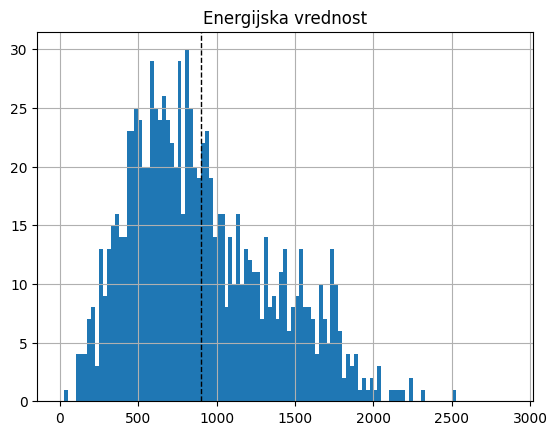

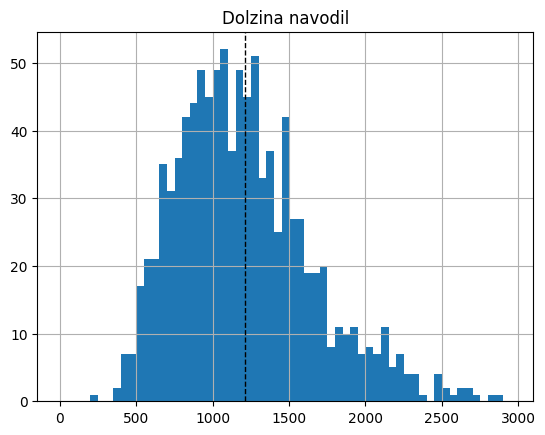

In [2]:
en_mean = recepti["Energijska vrednost"].mean()
recepti.hist("Energijska vrednost", bins=range(1, 2900, 25))
plt.axvline(en_mean, color='k', linestyle='dashed', linewidth=1)
print("Povprečna energijska vrednost je: " + "{:.2f}".format(en_mean) + " KJ")

dol_mean = recepti["Dolzina navodil"].mean()
recepti.hist("Dolzina navodil", bins=range(1, 3000, 50))
plt.axvline(dol_mean, color='k', linestyle='dashed', linewidth=1)
print("Povprečna dolžina besedila je: " +
      "{:.2f}".format(dol_mean) + " znakov")

Povprečna energijska vrednost je enaka okoli 215 kalorij, kar se glede na vse morda zdi presenetljivo malo. Ob predpostavki, da povprečen človek potrebuje 2000 kalorij na dan, bi potreboval kar 8 takih "povprečnih" obrokov, da bi zadovoljil svojo minimalno potrebo. A zapomniti si ji treba, da so tu podane kalorije na 100g, povprečen obrok pa je skoraj gotovo težji. Dolžina navodil pa je v povprečju rahlo nad 200 besed, enakovredno osnovošolskemu spisu v angleščini. No pa si poglejmo še odvisnost med energijsko vrednostjo jedi in njihovimi makronutrienti.

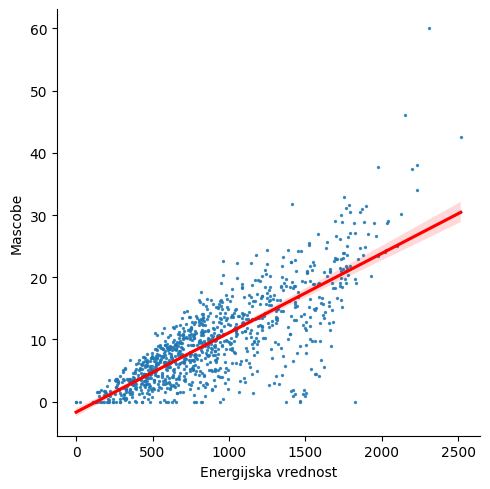

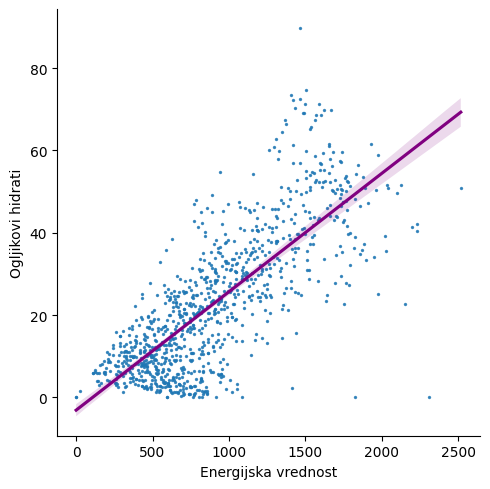

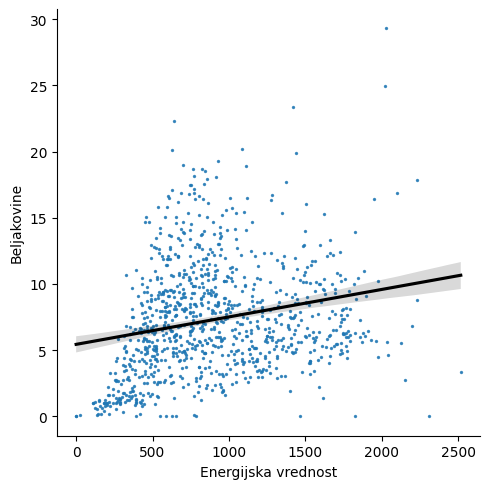

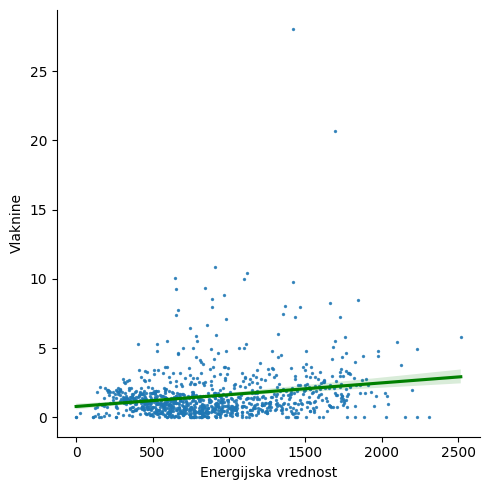

In [3]:
sns.lmplot(x="Energijska vrednost", y="Mascobe", data=recepti,
           fit_reg=True, line_kws={'color': 'red'}, scatter_kws={"s": 2})
sns.lmplot(x="Energijska vrednost", y="Ogljikovi hidrati", data=recepti,
           fit_reg=True, line_kws={'color': 'purple'}, scatter_kws={"s": 2})
sns.lmplot(x="Energijska vrednost", y="Beljakovine", data=recepti,
           fit_reg=True, line_kws={'color': 'black'}, scatter_kws={"s": 2})
sns.lmplot(x="Energijska vrednost", y="Vlaknine", data=recepti,
           fit_reg=True, line_kws={'color': 'green'}, scatter_kws={"s": 2})

Opazimo dokaj močno pozitivno korelacijo med energijsko vrednostjo in količino maščob,ogljikovih hidratov ter do neke mere vlaknin, ki so posebne v tem da jih je v vseh jedeh dokaj malo. Za beljakovine pa je graf dokaj raztresen, tako da v tem primeru linearna regresija ni najbolj uporabna metoda. Izgleda da so nekatere jedi bogate z beljakovinami, čeprav so relativno kalorično puste - morda so le-te raj za atlete? 

V dandanašnjem času je vse bolj pogosto pomanjkanje vitaminov, še posebno vitamina D. Poglejmo si, če dani recepti zadostijo našim potrebam vitamina D.


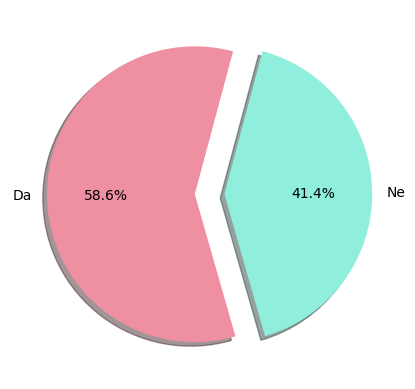

Povprečna dolžina kuhanja jedi z vitaminom D je: 36.62 min
Povprečna dolžina kuhanja jedi brez vitamina D je: 33.92 min


In [5]:
recepti.loc[recepti["Vitamin D"] == 0.0, "Vitamin D"] = "Ne"
recepti.loc[recepti["Vitamin D"] != "Ne", "Vitamin D"] = "Da"
plt.pie(recepti["Vitamin D"].value_counts(), labels=recepti["Vitamin D"].value_counts().index,
        startangle=75, autopct='%1.1f%%', shadow=True, explode=[0, 0.2], colors=["#ef8fa2", "#8fefdc"])
plt.show()
print("Povprečna dolžina kuhanja jedi z vitaminom D je: " +
      "{:.2f}".format(recepti[recepti["Vitamin D"] == "Da"].agg("Cas kuhanja").mean()) + " min")
print("Povprečna dolžina kuhanja jedi brez vitamina D je: " +
      "{:.2f}".format(recepti[recepti["Vitamin D"] == "Ne"].agg("Cas kuhanja").mean()) + " min")

Le malo več kot polovica jedi vsebuje vitamin D, kar je malo zaskrbljujoče. Gre pa naša analiza nasproti konvecionalni modrosti, da daljši časi kuhanja negativno vplivajo na vsebnost vitamina D. Seveda bi bilo to lahko le posledica izbranih sestavin, ki morda v nekaterih receptih sploh ne vsebujejo vitamina D, a takšna analiza je onkraj meja te seminarske naloge.

Obrnimo našo pozornost na dolžino priprave jedi. Mar so jedi z daljšim časom priprave bolj zapletena za pripravo? Morda je čas priprave ponavadi daljši od časa kuhanja? Tukaj bomo kot za proxy težavnosti uporabili kar dolžino recepta, torej privzemamo da so recepti z daljšimi navodili priprave tudi bolj komplicirani za pripravo.

Povprečen čas priprave je: 25.47 min.
Povprečen čas kuhanja je: 35.50 min.


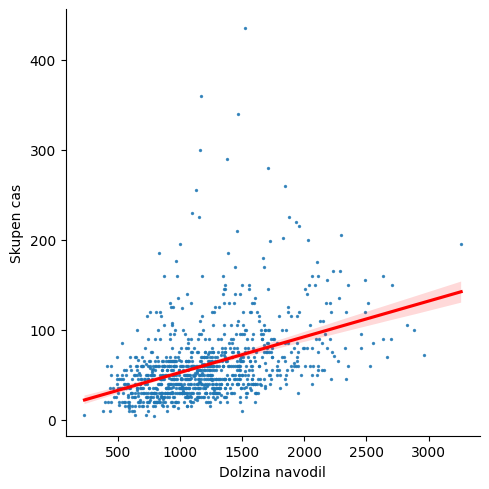

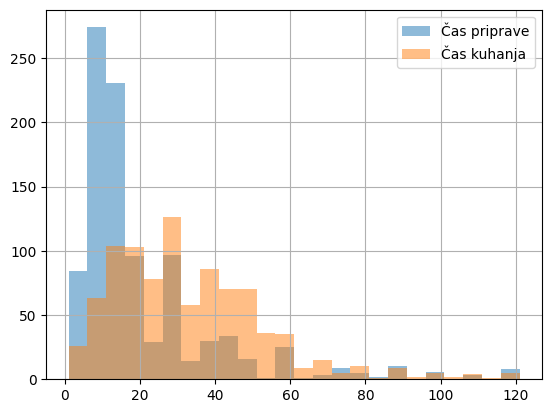

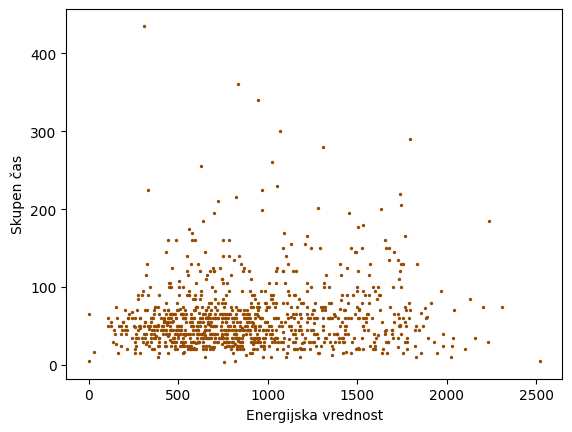

In [6]:
sns.lmplot(x="Dolzina navodil", y="Skupen cas", data=recepti,
           fit_reg=True, line_kws={'color': 'red'}, scatter_kws={"s": 2})
print("Povprečen čas priprave je: " +
      "{:.2f}".format(recepti["Cas priprave"].mean()) + " min.")
print("Povprečen čas kuhanja je: " +
      "{:.2f}".format(recepti["Cas kuhanja"].mean()) + " min.")

# truncatamo nekaj outlierjev zavoljo boljse preglednosti
recepti.hist("Cas priprave", bins=range(1, 125, 5),
             alpha=0.5, label='Čas priprave')
plt.hist(recepti["Cas kuhanja"], bins=range(
    1, 125, 5), alpha=0.5, label='Čas kuhanja')
plt.legend(loc='upper right')
plt.title("")
plt.show()

# relacija med casom kuhe in kaloricno vrednostjo
recepti.plot.scatter(y="Skupen cas", x="Energijska vrednost",
                     color="#964B00", s=2, ylabel="Skupen čas")
plt.show()

Opazimo pozitivno korelacijo med dolžino navodil ter skupnim časom kuhanja, izgleda da bolj komplicirani recepti ponavadi vendarle zahtevajo dalj časa za izvedbo. Prav tako vidimo, da večinoma čas priprave ne presega 20 minut, čas kuhanja pa se pogosto zavleče tudi do kakšne ure, torej čas priprave ponavadi ni največja ovira pri kuhanju. Jasne korelacije med energijsko vrednostjo in skupnim časom ni moč opaziti. Morda ima število oseb katerim je oseb recept namenjen vpliv na energijsko vrednost? Hipoteza: Za več oseb kot pripravljamo jed, manj energijsko bogata je in manj hranilnih snovi vsebuje. 

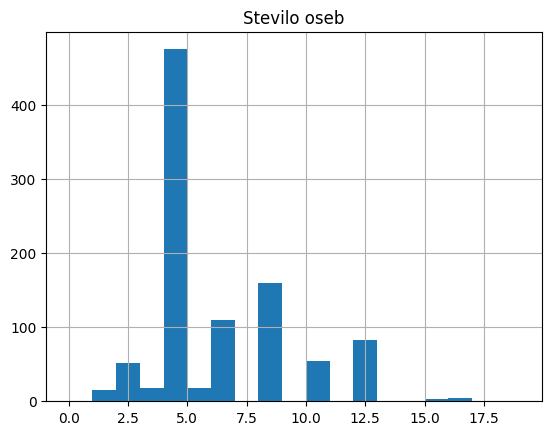

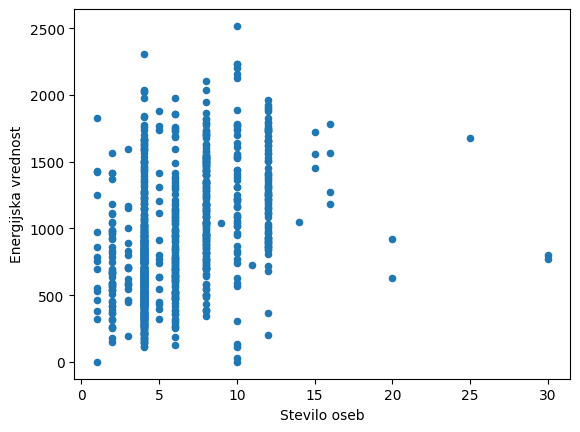

In [7]:
recepti.hist("Stevilo oseb" , bins= range(0,20,1))
plt.show()
recepti.plot.scatter(x="Stevilo oseb",y="Energijska vrednost")
plt.show()

Izkaže se, da je največ receptov namenjenih štirim osebam, ki vodijo z veliko večino. To oteži primerjavo z energijsko vrednostjo, saj imamo relativno majhno število podatkov za ostale frekvence, ampak iz teh omejenih podatkov lahko opazimo rahlo pozitivno korelacijo, torej za več ljudi kot pripravljamo jed, bolj energijsko bogata je. Po premisleku bi v to kategorijo spadala predvsem peciva, torte, pice, ipd., tako da ta korelacija morda vendarle ni tako nesmiselna. Poglejmo si kako je s hranilnimi vrednostmi.

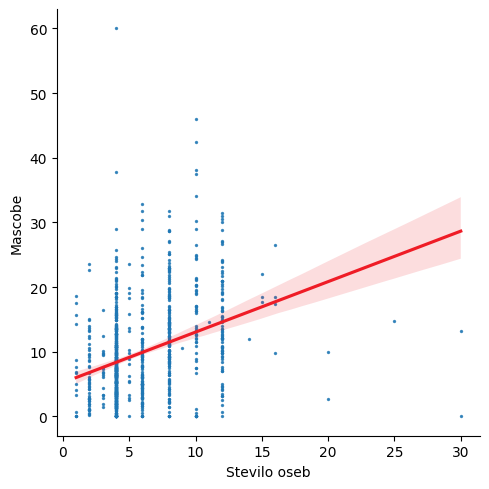

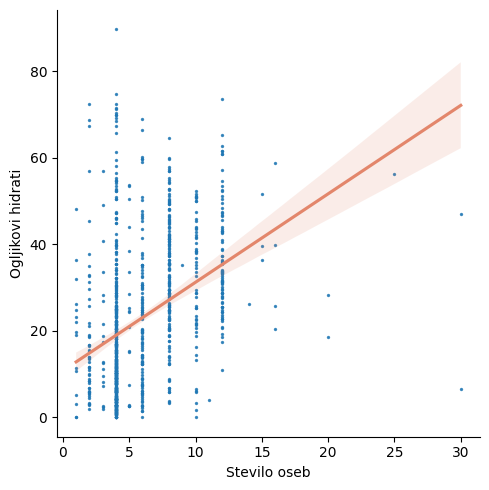

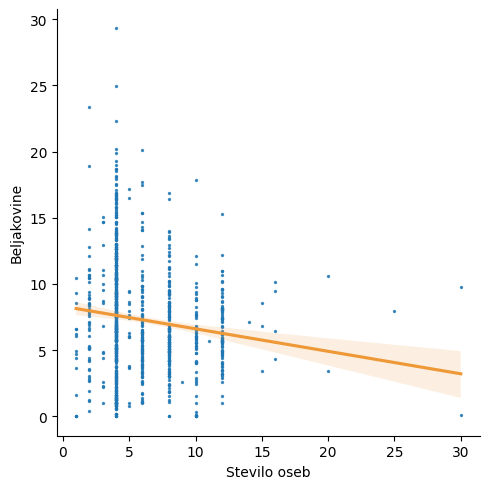

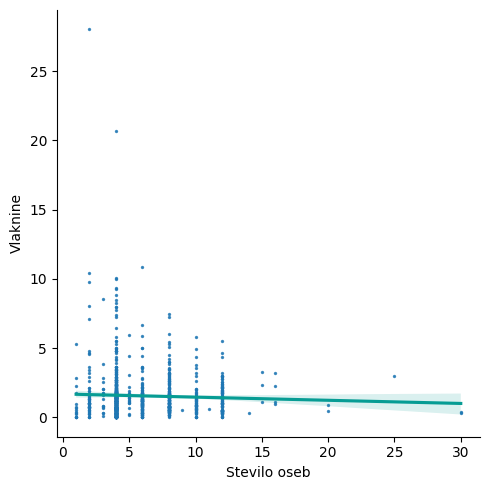

In [8]:
sns.lmplot(x="Stevilo oseb", y="Mascobe", data=recepti,
           fit_reg=True, line_kws={'color': '#ef1c26'}, scatter_kws={"s": 2})
sns.lmplot(x="Stevilo oseb", y="Ogljikovi hidrati", data=recepti,
           fit_reg=True, line_kws={'color': '#e3866b'}, scatter_kws={"s": 2})
sns.lmplot(x="Stevilo oseb", y="Beljakovine", data=recepti,
           fit_reg=True, line_kws={'color': '#ef9838'}, scatter_kws={"s": 2})
sns.lmplot(x="Stevilo oseb", y="Vlaknine", data=recepti,
           fit_reg=True, line_kws={'color': '#079c94'}, scatter_kws={"s": 2})

Korelacije so tu dokaj očitne: z ogljikovimi hidrati in maščobami imamo močno pozitivno korelacijo, z vlakninami in beljakovinami pa močno negativno. To bi podprlo hipotezo, da je hrana namenjena večjim skupinam ljudi predvsem v "nezdravi" kategoriji.

Oglejmo si še statistiko piscev na [Okusno.Je](https://okusno.je/). 

In [5]:
recepti.groupby("Avtor").agg("size").sort_values(ascending=False).head(10)

Avtor
M. J.            475
Su.S.            157
M.J.             137
Sanja Sirk       100
Kristina Turk     16
Su. S.            15
T. G.             10
Tjaša Ribič       10
MasterChef         8
Bruno Šulman       8
dtype: int64

Presenetljivo je razmeroma malo avtorjev odgovornih za večino receptov na [Okusno.Je](https://okusno.je/). Če upoštevamo, da sta `M.J.` in `M. J.` ter `Su.S.` in `Su. S.` očitno isti osebi, je prvih 8 avtorjev odgovornih za 936 od 1000 receptov! Poglejmo si vodilna `M. J.` in `Su.S.` podrobneje.

In [9]:
print("Povprečen čas peke avtorja M.J.: " +
      "{:.2f}".format(recepti[recepti["Avtor"] == "M. J."]["Skupen cas"].mean()) + " min")
print("Povprečen čas peke avtorja Su.S.: " +
      "{:.2f}".format(recepti[recepti["Avtor"] == "Su.S."]["Skupen cas"].mean()) + " min")
print("Povprečen kalorična vrednost avtorja M.J.: " + "{:.2f}".format(
    recepti[recepti["Avtor"] == "M. J."]["Energijska vrednost"].mean()) + " KJ")
print("Povprečen kalorična vrednost avtorja Su.S.: " + "{:.2f}".format(
    recepti[recepti["Avtor"] == "Su.S."]["Energijska vrednost"].mean()) + " KJ")
print("Povprečna količina proteinov avtorja M.J.: " +
      "{:.2f}".format(recepti[recepti["Avtor"] == "M. J."]["Beljakovine"].mean()) + " g")
print("Povprečna količina proteinov avtorja Su.S.: " +
      "{:.2f}".format(recepti[recepti["Avtor"] == "Su.S."]["Beljakovine"].mean()) + " g")
print("Povprečna količina maščob avtorja M.J.: " +
      "{:.2f}".format(recepti[recepti["Avtor"] == "M. J."]["Mascobe"].mean()) + " g")
print("Povprečna količina maščob avtorja Su.S.: " +
      "{:.2f}".format(recepti[recepti["Avtor"] == "Su.S."]["Mascobe"].mean()) + " g")

Povprečen čas peke avtorja M.J.: 57.09 min
Povprečen čas peke avtorja Su.S.: 56.67 min
Povprečen kalorična vrednost avtorja M.J.: 889.12 KJ
Povprečen kalorična vrednost avtorja Su.S.: 972.13 KJ
Povprečna količina proteinov avtorja M.J.: 7.13 g
Povprečna količina proteinov avtorja Su.S.: 7.77 g
Povprečna količina maščob avtorja M.J.: 9.99 g
Povprečna količina maščob avtorja Su.S.: 10.95 g


Najbolj proliferična avtorja kar jih [Okusno.Je](https://okusno.je/) premore med sta si med seboj dokaj podobna. Čas peke, količina maščob in beljakovin sta skoraj če ne identični, so pa `Su.S.` jedi rahlo energijsko bogatejše.

## Mercator 

Dober recept je seveda vitalna komponenta pred vsako ekskurzijo v kuhinjo, druga polovica pa seveda pride iz dobrih sestavin (v tem idealiziranem pogledu malenkosti kot so trenje in naše kuharske sposobnosti zanemarimo). Ker ima lokalen [Tuš](https://www.tus.si/trgovina/?woof_text=) majhno ponudbo, najbližji [Spar](https://www.spar.si/online/search/?q=&query=*&hitsPerPage=72&substringFilter=pos-visible:81701&q1=&x1=product-lifestyleInf) pa vse izdelke prikazuje z dinamičnim JavaScriptom, se po nakupih sprehodimo v [Mercatorjevo spletno trgovino](https://www.mercatoronline.si/sl/search). Oglejmo si torej nekaj dejstev o izdelkih, ki jih ponuja Mercator. 

In [10]:
izdelki = pd.read_csv(p.IZDELKI_PATH)
izdelki

,Ime izdelka,Znamka,Cena,Promocijska cena,Kolicina,Enota,Kategorija
0,Negazirana naravna mineralna voda,DANA,0.49,0.00,1.0,l,NEGAZIRANE VODE
1,Trajno polnomastno Alpsko mleko,ALPSKO MLEKO,1.59,1.09,1.0,l,TRAJNO MLEKO
2,Naravna gazirana mineralna voda,RADENSKA,0.86,0.00,1.0,l,GAZIRANE VODE
3,Negazirana mineralna voda,ZALA,0.59,0.00,1.0,l,ENIPUKS ENVOGALB ENTENRETNI ;EČAJIP ;EDOV ; ED...
4,Negazirana naravna mineralna voda,RADENSKA,0.49,0.00,1.0,l,NEGAZIRANE VODE
...,...,...,...,...,...,...,...
15374,Risalni blok A3,RUCKSACK,3.29,2.49,1.0,kos,BLOKI
15375,Risalni blok A3,RUCKSACK,3.29,2.49,1.0,kos,BLOKI
15376,Beležka A6,ABC-123,1.49,1.19,1.0,kos,ZVEZKI
15377,Arašidova omaka,PANTAINORASINGH TAJSKA PERH.,4.39,0.00,1.0,g,AZIJSKA PREHRANA


Podatki so večinoma v redu, je pa nekaj kategorij narobe podanih, ter enote so prav tako občasno napačne. Nesmiselne kategorije bomo v nadaljnjem izpustili, enote pa pridejo v upoštev le pri sintezi kasneje, ki pa je povsem na srečo povsem informativne narave. 

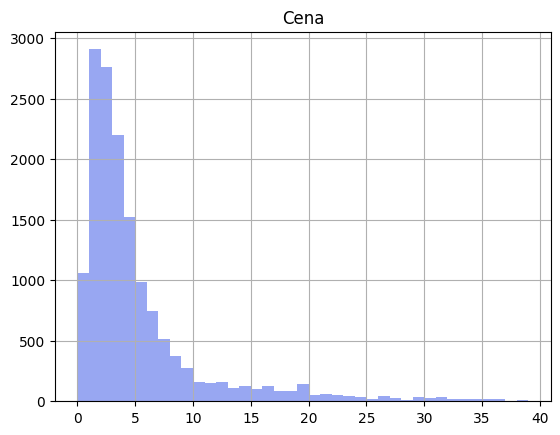

In [11]:
izdelki.hist("Cena", bins=range(0, 40, 1), color="#98a7f2")
plt.show()

In [12]:
izdelki.drop(columns="Promocijska cena").describe()

,Cena,Kolicina
count,15379.000000,15379.000000
mean,6.836622,34.503386
std,19.248111,211.534196
min,0.090000,0.001000
25%,1.990000,1.000000
50%,3.490000,1.000000
75%,6.290000,1.000000
max,1099.990000,10000.000000


Povprečna cena izdelkov v Mercatorju je okoli 6.8 EUR (po redni ceni). Večina izdelkov je cenejših od 5 evrov, ampak imamo tudi nekaj ekstremnih vrednosti, ki nam malo kvarijo povprečje. Le upamo lahko, da to niso živila ampak morda kakšna elektronika (imamo tudi izdelke dražje od 40 EUR, ki jih ni na grafu). Promocijske cene izdelkov si bomo ogledali pozneje, saj v primeru ko ni promocije je vrednost v tabeli `0.0`, kar bi tu dalo varljive rezultate, sicer pa bomo opazili da je efekt zanemarljivo majhen. Recimo, da nas zanima katera znamka je najugodnejša:

In [13]:
izdelki.groupby("Znamka").agg("Cena").mean().sort_values()

Znamka
PRIME                 0.300000
BANANKO               0.390000
ZOTT KAFFEE GOLD      0.390000
FALLINI               0.430000
ZOTT LIEGEOIS         0.490000
                       ...    
BLIST VALJEVO       219.990000
MAMIBOT             259.990000
ROWENTA             293.323333
ASUS                379.990000
AVENLI              446.596000
Name: Cena, Length: 1876, dtype: float64

V povprečju sta najcenejši torej znamki `Prime` ter  `Zott Kaffe Gold`, najdražji pa `Asus` in `Avenli`, prodajalca računalnikov in pa bazenov. Nas seveda najbolj zanimajo prodajalci hrane, da bomo lahko izvedli povezavo z Okusno.Je ;). Morda bolj kot po znamki je smiselno filtriranje po kategoriji, čeprav so tudi tu rezultati načeloma dokaj predvidljivi. 

In [14]:
izdelki.groupby("Kategorija").agg("Cena").mean().sort_values()

Kategorija
ENIPUKS ENVOGALB ENTENRETNI ;EČAJIP ;EDOV ; EDOV ENARIZAGEN               0.656667
 VANILIJ SLADKOR; PECILNI PRAŠEK                                          0.676875
ENIPUKS ENVOGALB ENTENRETNI ;EČAJIP ;EDOV ;IKTADOD Z EDOV ENARIZAGEN      0.690000
ENIPUKS ENVOGALB ENTENRETNI ;EČAJIP ;EDOV ; EDOV ENARIZAG                 0.790000
 NEGAZIRANE VODE Z DODATKI                                                0.876364
                                                                           ...    
 ELEKTRIČNE ZOBNE ŠČETKE                                                103.272000
 OGREVANJE                                                              113.323333
 POTOVANJE                                                              149.980000
 TELEVIZORJI                                                            299.990000
 BAZENI IN BAZENSKA TEHNIKA                                             602.492500
Name: Cena, Length: 470, dtype: float64

Opala, izgleda da so nekatere kategorije bile na spletni strani narobe podane, in sicer niso bile pravilno ločeni med seboj, povrh vsega pa so napisane v napačno smer. O napaki sem že obvestil Mercatorjevo IT podporo, in po treh delovnih dneh brez odgovora sem zadevo predal v roke lokalne policije. Prekršnike lahko izbrišemo iz tabele:

In [15]:
izdelki = izdelki[izdelki["Kategorija"] !=
                  "ENIPUKS ENVOGALB ENTENRETNI ;EČAJIP ;EDOV ; EDOV ENARIZAGEN"]
izdelki = izdelki[izdelki["Kategorija"] !=
                  "ENIPUKS ENVOGALB ENTENRETNI ;EČAJIP ;EDOV ;IKTADOD Z EDOV ENARIZAGEN"]
izdelki = izdelki[izdelki["Kategorija"] !=
                  "ENIPUKS ENVOGALB ENTENRETNI ;EČAJIP ;EDOV ; EDOV ENARIZAG"]
izdelki = izdelki[izdelki["Kategorija"] !=
                  "ENIPUKS ENVOGALB ENTENRETNI ;EČAJIP ;EDOV ;IKTADOD Z EDOV ENARIZAG"]
izdelki.groupby("Kategorija").agg("Cena").mean().sort_values()

Kategorija
VANILIJ SLADKOR; PECILNI PRAŠEK      0.676875
NEGAZIRANE VODE Z DODATKI            0.876364
GAZIRANE VODE Z DODATKI              1.006667
PEKOVSKO PECIVO                      1.036383
KVAS                                 1.094286
                                      ...    
ELEKTRIČNE ZOBNE ŠČETKE            103.272000
OGREVANJE                          113.323333
POTOVANJE                          149.980000
TELEVIZORJI                        299.990000
BAZENI IN BAZENSKA TEHNIKA         602.492500
Name: Cena, Length: 466, dtype: float64

Kot bi morda pričakovali so najcenejši manjši pekovski izdelki ter voda, najdražja pa sta elektronika ter kot je prejšnja tabela nakazovala, bazeni. Mogoče bi bila koristna vizualizacija z besednimi oblaki, da dobimo celotno sliko. Spodnja slika prikazuje najpogostejše kategorije; večje kot je besedilo, vec izdelkov je v tej kategoriji. Vidimo, da prevladujejo čokolada, prehranska dopolnila in deodoranti.

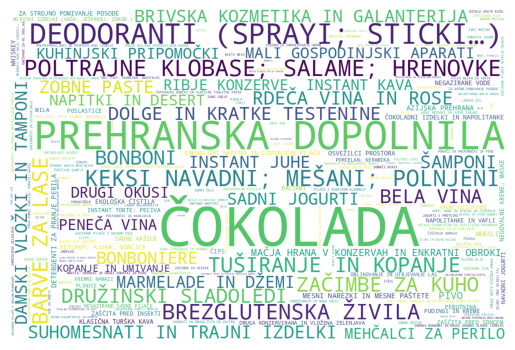

In [17]:
wordcloud = WordCloud(width=1200, height=800, background_color="white").generate_from_frequencies(
    izdelki["Kategorija"].value_counts())
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Sinteza

Z izbranim receptom in informacijami o cenah sestavin imamo vse potrebne podatke za izračun cen jedi. Po tem koraku pa nam ne preostane nič drugega kot da se odpravimo naravnost v kuhinjo. No pa se povzpnimo na vrh dramskega trikotnika te seminarske naloge in ugotovimo katere jedi so najcenejše za pripravo, katere so najdražje, in vse vmes.

In [ ]:
import utility as ut

# pomozna funkcija da ugotovimo podobnost stringov
# razdeli stringe na besede in primerja podobnost besed (drugace dobimo absurdne rezultate, npr. "olivnega olja" matcha z "Hladilna torba")


def similar(a, b):
    r = 0
    bb = list(b.strip().split())
    for i in a.strip().split():
        for j in bb:
            cnt = 0
            # primerja podobnost prefixov besed v stringu (hevristicna resitev)
            for k in range(min(len(i), len(j))):
                if i[k] != j[k]:
                    break
                cnt += 1
            if cnt > 3:
                r += cnt*cnt
    return r


f = open("data/cene.csv", "w")
f.write("Ime jedi,Cena,Promocijska cena\n")
default_cena = 1  # default parameter ce ne najdemo nobenega podobnega izdelka
# cachamo parsanje izdelkov (program gre iz ~100min -> ~15min)
izd_itr = list(izdelki.iterrows())
# za vsako jed gremo cez vse sestavine in jim dolocimo ceno
for _, recepti_row in recepti.iterrows():
    csv = recepti_row["CSV"]
    # dobimo vse sestavine
    sestavine = pd.read_csv(p.SESTAVINE_PREFIX + csv + ".csv")
    skupna_cena = 0.0
    skupna_promocijska_cena = 0.0
    # iz imena sestavine najdemo najblizji match v tabeli izdelkov
    for _, row in sestavine.iterrows():
        ime_sestavine = row["Ime sestavine"]
        kolicina = row["Kolicina"]
        enota = row["Enota"]
        # najdi match
        best_match = 0.6  # neka zacetna toleranca
        best_cena = default_cena
        best_prom_cena = default_cena
        for i, r in izd_itr:
            if enota != r["Enota"]:
                continue  # ce nista v istih enotah nadaljujemo
            sim = similar(r["Ime izdelka"], ime_sestavine)
            if sim < best_match:
                continue  # ugotovimo podobnost, ce je slabsa od trenutnega najboljsega nadaljujemo
            best_match = sim
            # ce je promocijska cena 0.0, ni promocije
            prom_cena_izdelka = r["Promocijska cena"]
            if prom_cena_izdelka == 0.0:
                prom_cena_izdelka = r["Cena"]
            # prioriteta je najblizji zadetek, ce je vec enakih gledamo najnizjo ceno
            if sim > best_match:
                best_cena = r["Cena"] * kolicina
                best_prom_cena = r["Promocijska cena"] * kolicina
            else:
                best_cena = min(best_cena, r["Cena"] * kolicina)
                best_prom_cena = min(
                    best_prom_cena, r["Promocijska cena"] * kolicina)

        skupna_cena += best_cena
        skupna_promocijska_cena += best_prom_cena
    # shranimo ceni za to jed v csv
    f.write(ut.arr_to_csv([recepti_row["Ime jedi"],
            skupna_cena, skupna_promocijska_cena]))
f.close()

Z izvedbo zgornje celice pridobimo informacije o cenah ki se po privzeti vrednosti zapise v `cene.csv`. Ker je izvedba programa v Pythonu dokaj počasna, priporočam uporabo C++ verzijo, več informacij v `README.md`. Na kakršenkoli način generiramo datoteko, jo lahko brez težav nadaljne analiziramo. 

In [18]:
cene = pd.read_csv(p.CENE_PATH)
cene = cene.sort_values("Cena")
cene

,Ime jedi,Cena,Promocijska cena
385,Bučni pire,0.20900,0.1800
439,Marelična marmelada brez sladkorja,1.00000,1.0000
341,V pečici pečen kostanj,1.00000,1.0000
529,Čokoladni drip (za dekoriranje tort),2.00000,2.0000
528,Mousse iz bele čokolade,2.68425,2.3880
...,...,...,...
707,Pečene račje prsi; ganaš iz gosjih jeter; glaz...,24.45600,24.2393
958,Mousse iz čokolade z vrtnico; sorbet iz malin ...,25.43000,25.4300
991,Jagnječja zarebrnica v vinski omaki; kremna po...,27.99500,27.9950
992,Ješprenj z dimljenim svinjskim vratom; pire iz...,28.47820,28.2882


Torej najcenejša pojedina je bučni pire za samo ~20 centov na osebo, sledita mu marelična marmelada in pa pečen kostanj. Najdražja pa je potratna potica s čokolado, za skoraj 33 evrov. Sledita ji ješprenj z dimljenim svinjskim vratom in pa jagnječja zarebrnica, a ti dve (in nekaj jedi naprej) vsebujejo več delov (poleg ješprena tudi pire in fižolovo kremo). Potratna potica pa je resnično potratna v vseh pomenih besede. Opombe vredno je, da so te cene le informativne narave, in nekatere ekstremne vrednosti so skoraj gotovo nenatančne zaradi mismatchov pri sintezi, po naravi naše hevristične rešitve. Morda bi si bilo bolj smiselno ogledati povprečja:

Povprečna cena je: 9.44 EUR
Povprečna promocijska cena je: 9.37 EUR


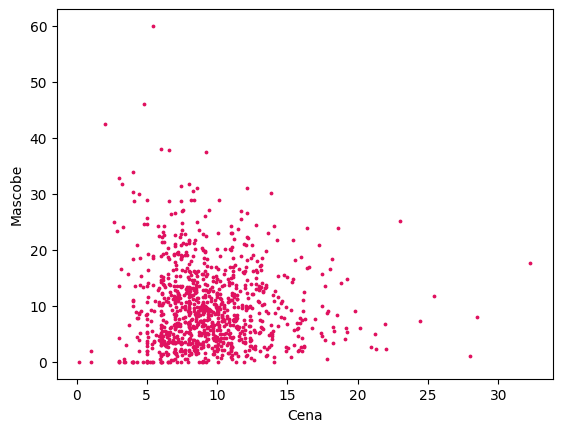

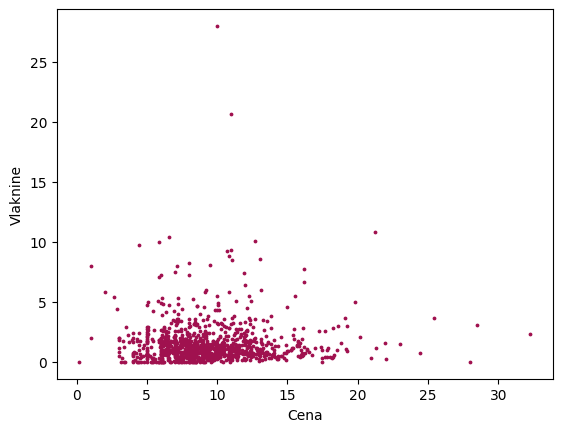

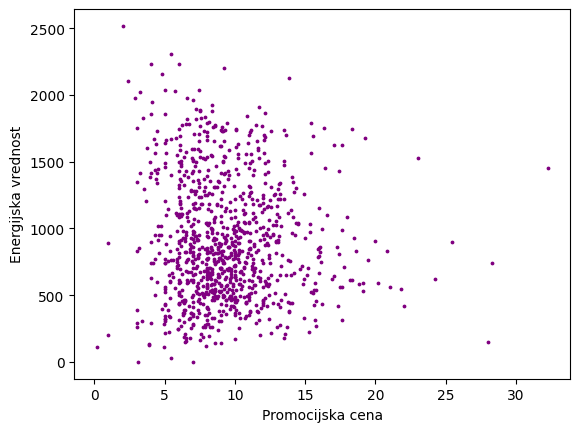

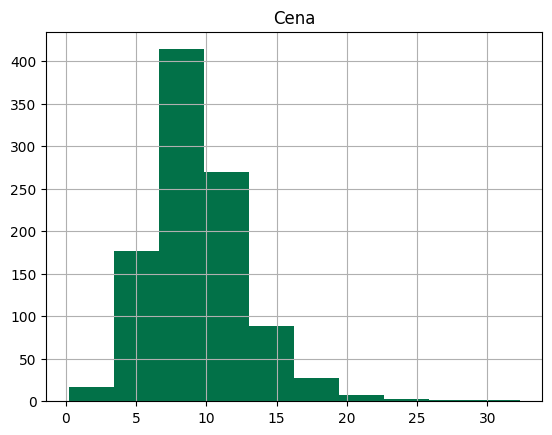

In [19]:
recepti = pd.read_csv(p.RECEPTI_PATH) # da ni potreben reload receptov zgoraj vsakic ko pozenemo to celico
recepti = recepti.merge(cene)
recepti.plot.scatter(x="Cena",y="Mascobe",s=3, color = "#e0115f")
recepti.plot.scatter(x="Cena",y="Vlaknine",s=3, color = "#a0114f")
recepti.plot.scatter(x="Promocijska cena",y="Energijska vrednost",s=3, color = "purple")
recepti.hist("Cena", color = "#027148")
print("Povprečna cena je: " + "{:.2f}".format(recepti["Cena"].mean()) + " EUR")
print("Povprečna promocijska cena je: "+ "{:.2f}".format(recepti["Promocijska cena"].mean()) + " EUR")

Presentljivo bi lahko trdili da ni povezave med ceno/promocijsko ceno jedi in njeno energijsko vrednostjo oz. količino vsebovanih hranilnih snovi. Vse vrednosti se dokaj dobro prekrivajo s histogramom cen jedi, varianco med njimi lahko razložimo s tem, da je točk v nekaterih intervalih preprosto več. Povprečna cena jedi je okoli 9 evrov in pol, za kar bi lahko krivili inflacijo. Je pa tudi res da nekatere sestavine (npr. poper etc.) kupimo enkrat za recimo 2 evra in ga potem uporabimo v nešteto jedeh. Torej ob predpostavki povsem sferičnega, popolnoma praznega hladilnika (in shrambe) je cena ene jedi višja kot bi bila sicer.

Za mitigacijo tega bi lahko definirali množico sestavin, ki jih nebi upoštevali v izračunu, ampak bi spet naleteli na prejšnji "matching" problem. Beseda o tem: stestiral sem tudi uporabo drugih funkcij, drugih načinov za ocenjevanje razlike med sestavinami in izdelki: različne pythonske funkcije, preprosta Levensteinova razdalja ipd., a ni nič obrodilo boljših rezultatov kot zgornja hevristika, pogosto za ceno podalšanja časa izvajanja ("edit distance" podaljša čas za ~3x). Seveda zgornja funkcija ni popolna, občasno se zgodi da ne najde stvari ki so v bazi ali pa da najde nekaj vsebinsko drugačnega (npr. "Namaz z bučnimi semeni" poparčka z "bučnega olja"). Razvoj nadaljnih rešitev teh problemov prebuščam v razmislek bralcem.

# Zaključek

Ugotovili smo torej da obstaja pozitivna korelacija med energijsko vrednostjo jedi in vsebnostjo maščob, ogljikovih hidratov in vlaknin, ni pa korelacije za beljakovine. Prav tako ni korelacije med časom kuhanja in kalorično vrednostjo, je pa med dolžino navodil in pa časom kuhanja - zahtevnejši kot je recept, dlje ga kuhamo. Ugotovljali smo tudi proliferičnost avtorjev Okusno.Je in kakšne so razlike med njihovimi recepti. 

Nato smo si pogledali povprečno ceno Mercatorjevih izdelkov ter tako nadražje kot tudi najcenejše kategorije izdelkov. Rezultate smo povzeli z informativno vizualizacijo. Za konec pa smo pridobljene podatke iz Mercatorjeve spletne trgovine in Okusno.Je združili, da smo ugotovili katere jedi so cenovno najugodnejše ter kakšne so njihove kalorične in hranilne vrednosti.

Potrebno je poudariti omejitve take analize, saj je iskanje izdelkov med različnimi spletnimi stranmi samo po sebi nezanesljivo, zato so tudi pridobljeni podatki nekoliko nezanesljivi, a predstavljajo dobro osnovo na kateri lahko gradimo morebitno prihodnjo analizo.